# Practical Assignment
Use Boston data to apply random forests and create a plot displaying the test error resulting from random
forests on this data set for a comprehensive range of values for max_features and n_estimators. Describe the results obtained.

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from ISLP import load_data , confusion_table
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS
from sklearn.ensemble import RandomForestRegressor as RF

In [2]:
# load the Boston data
Boston = load_data("Boston") # load data
X = Boston.drop(columns='medv').values
y = Boston['medv'].values

In [3]:
# split the dataset into training and testing datasets
(X_train ,
X_test ,
y_train ,
y_test) = skm.train_test_split(X,
                               y,
                               test_size=0.3,
                               random_state=0)

In [4]:
# Let's evaluate model performance for more features and estimators
feature_list    = range(3,5+1) # from 3 to 6
estimators_list = range(1,500,10)

# preallocate results array
reg_err = np.zeros((len(estimators_list), len(feature_list)))

# estimate regression errors for specified values of max_features and n_estimators
for idx_e, e in enumerate(estimators_list):
    print('Estimators # ' + str(e))
    for idx_f, f in enumerate(feature_list):
        RF_boston = RF(max_features=f,
                       n_estimators=e,
                       random_state=0).fit(X_train , y_train)
        y_hat_RF = RF_boston.predict(X_test)
        reg_err[idx_e, idx_f] = np.mean((y_test - y_hat_RF)**2) 


Estimators # 1
Estimators # 11
Estimators # 21
Estimators # 31
Estimators # 41
Estimators # 51
Estimators # 61
Estimators # 71
Estimators # 81
Estimators # 91
Estimators # 101
Estimators # 111
Estimators # 121
Estimators # 131
Estimators # 141
Estimators # 151
Estimators # 161
Estimators # 171
Estimators # 181
Estimators # 191
Estimators # 201
Estimators # 211
Estimators # 221
Estimators # 231
Estimators # 241
Estimators # 251
Estimators # 261
Estimators # 271
Estimators # 281
Estimators # 291
Estimators # 301
Estimators # 311
Estimators # 321
Estimators # 331
Estimators # 341
Estimators # 351
Estimators # 361
Estimators # 371
Estimators # 381
Estimators # 391
Estimators # 401
Estimators # 411
Estimators # 421
Estimators # 431
Estimators # 441
Estimators # 451
Estimators # 461
Estimators # 471
Estimators # 481
Estimators # 491


Features # 3
Features # 4
Features # 5


Text(0, 0.5, 'Regression Error')

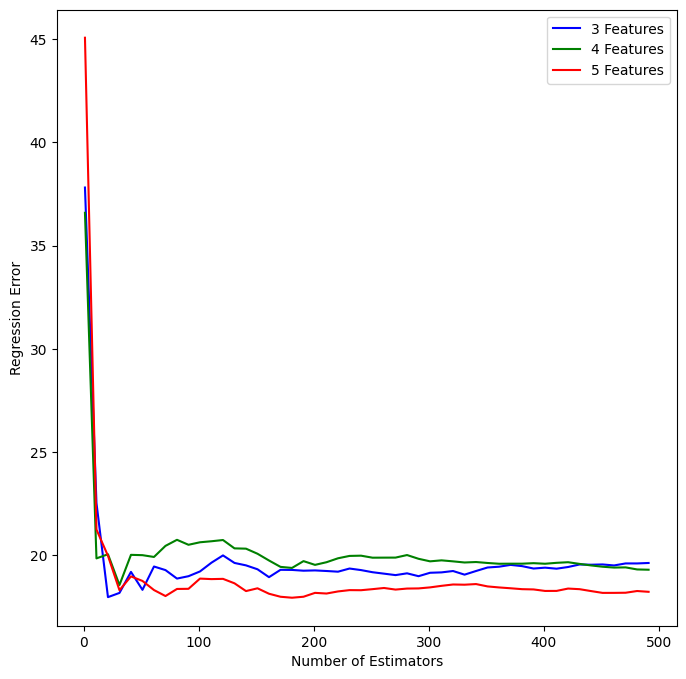

In [5]:
# let's plot the results
# I want to plot a line for feature number in coordinates of estimators number and regression error
color_list = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b', 'g', 'r']

ax = subplots(figsize=(8,8))[1]

for idx_f, f in enumerate(feature_list):
    print('Features # ' + str(f))
    ax.plot(estimators_list ,
            reg_err[:,idx_f] ,
            color_list[idx_f] ,
            label=str(f) + ' Features')

ax.legend();
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Regression Error')